In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [4]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 361B-9495

 Directory of C:\Users\Karthik\Downloads\assignments\simple linear regression

23-01-2023  11:57    <DIR>          .
23-01-2023  11:08    <DIR>          ..
23-01-2023  11:09    <DIR>          .ipynb_checkpoints
06-01-2023  19:53               218 delivery_time.csv
06-01-2023  19:53               318 Problem_statements.txt
06-01-2023  19:53               454 Salary_Data.csv
23-01-2023  11:57               830 Salary_data_SLR.ipynb
               4 File(s)          1,820 bytes
               3 Dir(s)  334,726,651,904 bytes free


In [5]:
print(pd.__version__)
print(np.__version__)

1.4.4
1.21.5


In [6]:
sal_data = pd.read_csv("Salary_Data.csv")
sal_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
sal_data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [9]:
sal_data.shape

(30, 2)

In [12]:
sal_data.rename(columns={'YearsExperience':'year','Salary':'sal'},inplace=True)
sal_data

,year,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


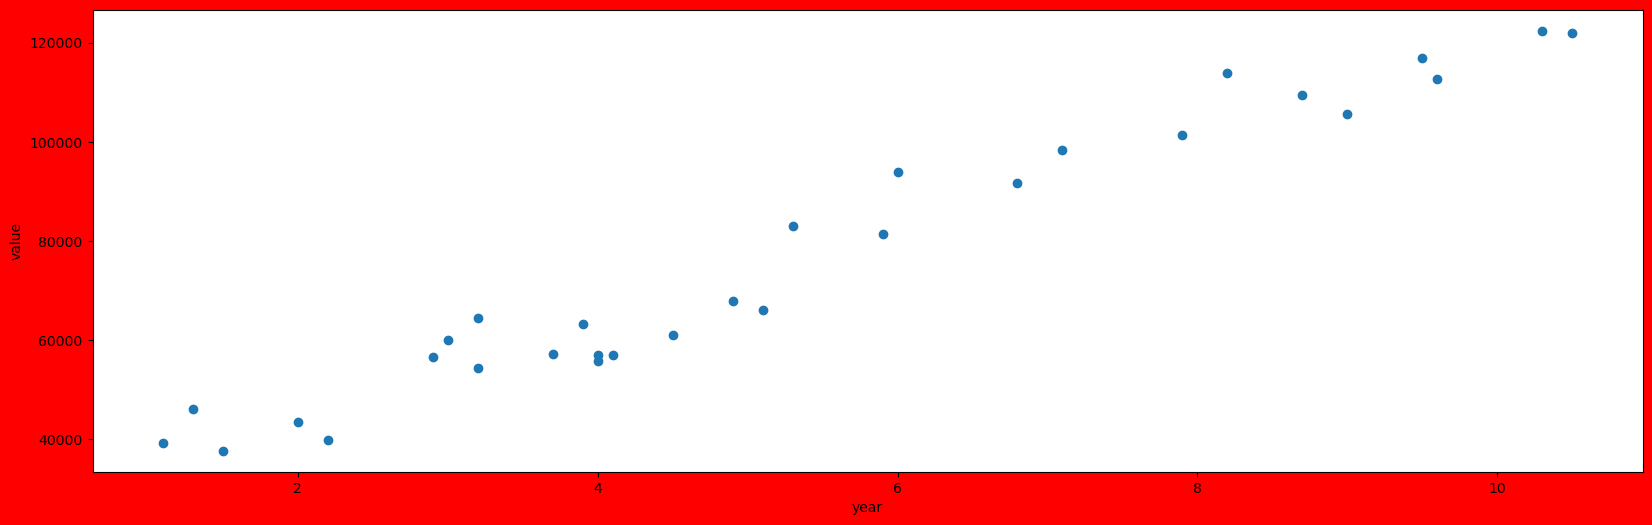

In [14]:
plt.figure(figsize=(20,6),facecolor="red")
plt.scatter(sal_data.year,sal_data.sal)
plt.xlabel("year")
plt.ylabel("value")
plt.show()

In [15]:
sal_data.corr()

,year,sal
year,1.000000,0.978242
sal,0.978242,1.000000


In [17]:
f1=smf.ols("sal~year",data=sal_data).fit()

In [18]:
f1.params

Intercept    25792.200199
year          9449.962321
dtype: float64

In [19]:
f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        12:13:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
year        9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

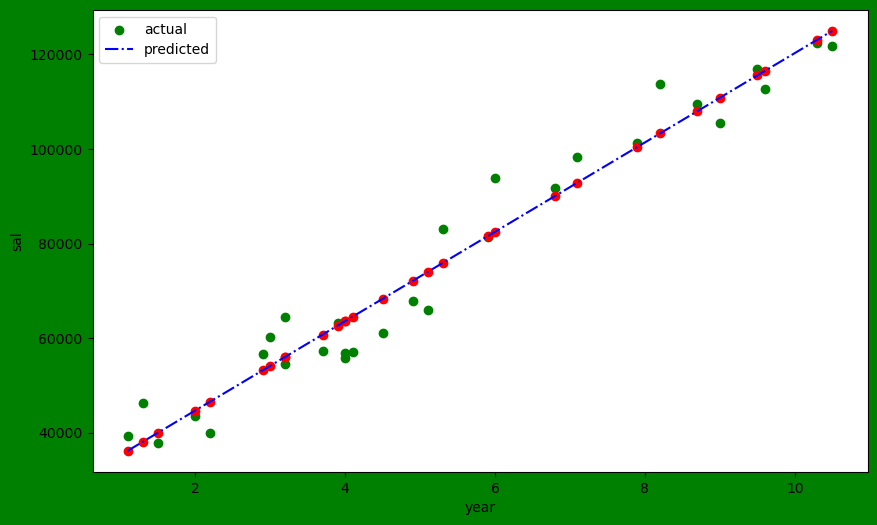

In [27]:
plt.figure(figsize=(10,6),facecolor="green")
plt.scatter(sal_data.year,sal_data.sal,label="actual",color="green")
plt.plot(sal_data.year,f1.predict(),label="predicted",linestyle="-.",color="blue")
plt.scatter(sal_data.year,f1.predict(),color="red")
plt.xlabel("year")
plt.ylabel("sal")
plt.legend(loc="best")
plt.show()

In [28]:
f2=smf.ols('sal~np.log(year)',data=sal_data).fit()
f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        12:31:34   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(year)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
f3=smf.ols('np.log(sal)~(year)',data=sal_data).fit()
f3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(sal)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        12:35:15   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
year           0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
sal_data["year_sq"]=sal_data.year**2
print(sal_data)
model_quad=smf.ols("np.log(sal)~year+year_sq",data=sal_data).fit()
model_quad.summary()

    year       sal  year_sq
0    1.1   39343.0     1.21
1    1.3   46205.0     1.69
2    1.5   37731.0     2.25
3    2.0   43525.0     4.00
4    2.2   39891.0     4.84
5    2.9   56642.0     8.41
6    3.0   60150.0     9.00
7    3.2   54445.0    10.24
8    3.2   64445.0    10.24
9    3.7   57189.0    13.69
10   3.9   63218.0    15.21
11   4.0   55794.0    16.00
12   4.0   56957.0    16.00
13   4.1   57081.0    16.81
14   4.5   61111.0    20.25
15   4.9   67938.0    24.01
16   5.1   66029.0    26.01
17   5.3   83088.0    28.09
18   5.9   81363.0    34.81
19   6.0   93940.0    36.00
20   6.8   91738.0    46.24
21   7.1   98273.0    50.41
22   7.9  101302.0    62.41
23   8.2  113812.0    67.24
24   8.7  109431.0    75.69
25   9.0  105582.0    81.00
26   9.5  116969.0    90.25
27   9.6  112635.0    92.16
28  10.3  122391.0   106.09
29  10.5  121872.0   110.25


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(sal)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           3.95e-18
Time:                        12:38:59   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
year           0.2024      0.027      7.601      0.000       0.148       0.257
year_sq       -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
sal_data["year_cube"]=sal_data.year**3
print(sal_data)
model_quad=smf.ols("np.log(sal)~year+year_sq+year_cube",data=sal_data).fit()
model_quad.summary()

    year       sal  year_sq  year_cube
0    1.1   39343.0     1.21      1.331
1    1.3   46205.0     1.69      2.197
2    1.5   37731.0     2.25      3.375
3    2.0   43525.0     4.00      8.000
4    2.2   39891.0     4.84     10.648
5    2.9   56642.0     8.41     24.389
6    3.0   60150.0     9.00     27.000
7    3.2   54445.0    10.24     32.768
8    3.2   64445.0    10.24     32.768
9    3.7   57189.0    13.69     50.653
10   3.9   63218.0    15.21     59.319
11   4.0   55794.0    16.00     64.000
12   4.0   56957.0    16.00     64.000
13   4.1   57081.0    16.81     68.921
14   4.5   61111.0    20.25     91.125
15   4.9   67938.0    24.01    117.649
16   5.1   66029.0    26.01    132.651
17   5.3   83088.0    28.09    148.877
18   5.9   81363.0    34.81    205.379
19   6.0   93940.0    36.00    216.000
20   6.8   91738.0    46.24    314.432
21   7.1   98273.0    50.41    357.911
22   7.9  101302.0    62.41    493.039
23   8.2  113812.0    67.24    551.368
24   8.7  109431.0    75.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(sal)   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           3.40e-17
Time:                        12:39:54   Log-Likelihood:                 33.247
No. Observations:                  30   AIC:                            -58.49
Df Residuals:                      26   BIC:                            -52.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4485      0.112     93.230      0.000      10.218      10.679
year           0.1143      0.076      1.504      0.145      -0.042       0.271
year_sq        0.0118      0.015      0.782      0.441      -0.019       0.043
year_cube     -0.0011      0.001     -1.236      0.228      -0.003       0.001
==============================================================================
Omnibus:                        1.078   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                1.070
Skew:                           0.366   Prob(JB):                        0.586
Kurtosis:                       2.435   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""